In [ ]:
"""Veri Dönüştürme: Ayrıklaştırma ve Binning"""
import pandas as pd
import numpy as np

data = {
    'continuous_column': [1.5, 2.3, 5.7, 7.9, 3.6, 4.4, 6.1, 8.5, 9.2]
}

df = pd.DataFrame(data)
df['binned_column'] = pd.cut(df['continuous_column'], bins=3, labels=["Low", "Medium", "High"])

print("Orijinal sürekli değerler:")
print(df['continuous_column'])

print("Binned:")
print(df[['continuous_column', 'binned_column']])

Orijinal sürekli değerler:
0    1.5
1    2.3
2    5.7
3    7.9
4    3.6
5    4.4
6    6.1
7    8.5
8    9.2
Name: continuous_column, dtype: float64
Binned:
   continuous_column binned_column
0                1.5           Low
1                2.3           Low
2                5.7        Medium
3                7.9          High
4                3.6           Low
5                4.4        Medium
6                6.1        Medium
7                8.5          High
8                9.2          High


In [ ]:
"""Veri Dönüştürme: Polinomial Dönüşümler"""
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

data = {
    'feature': [2, 4, 6, 8, 10]
}
df = pd.DataFrame(data)

poly = PolynomialFeatures(degree=2)

# Dönüştürme işlemi
df_poly = poly.fit_transform(df[['feature']])

# DataFrame oluşturma
df_poly = pd.DataFrame(df_poly, columns=['1', 'feature', 'feature^2'])

print(df_poly)


     1  feature  feature^2
0  1.0      2.0        4.0
1  1.0      4.0       16.0
2  1.0      6.0       36.0
3  1.0      8.0       64.0
4  1.0     10.0      100.0


In [ ]:
import pandas as pd

# Örnek DataFrame
data = {
    'first_name': ['Gamze', 'Nur'],
    'last_name': ['Aslan', 'Gunes'],
    'date': ['2023-10-01', '2024-01-15']
}
df = pd.DataFrame(data)

# 'date' kolonunu datetime formatına çevirme
df['date'] = pd.to_datetime(df['date'])

# Yeni kolonları oluşturma
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

print(df)


  first_name last_name       date    full_name  year  month  day
0      Gamze     Aslan 2023-10-01  Gamze Aslan  2023     10    1
1        Nur     Gunes 2024-01-15    Nur Gunes  2024      1   15


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Örnek veri
data = {
    'feature1': [1, 2, None, 4],
    'feature2': [5, None, 7, 8],
    'target': [1, None, 3, 4]
}
df = pd.DataFrame(data)

# Eksik değerlerin tamamlanması
imputer = SimpleImputer(strategy='mean')
df[['feature1', 'feature2']] = imputer.fit_transform(df[['feature1', 'feature2']])

print("Eksik değerler doldurulduktan sonraki orijinal veri seti:")
print(df)

# Modelin oluşturulması
model = LinearRegression()

# target için eksik olanları bırak
df_train = df.dropna(subset=['target'])

# Modeli eğit
model.fit(df_train[['feature1', 'feature2']], df_train['target'])

# Tahmin yap
predicted_values = model.predict(df[['feature1', 'feature2']])

# Tahmin edilen değerleri eksik olan target'lara doldur
df['target'].fillna(pd.Series(predicted_values, index=df.index), inplace=True)

print("Doldurulmuş veri seti:")
print(df)

Eksik değerler doldurulduktan sonraki orijinal veri seti:
   feature1  feature2  target
0  1.000000  5.000000     1.0
1  2.000000  6.666667     NaN
2  2.333333  7.000000     3.0
3  4.000000  8.000000     4.0
Doldurulmuş veri seti:
   feature1  feature2    target
0  1.000000  5.000000  1.000000
1  2.000000  6.666667  2.666667
2  2.333333  7.000000  3.000000
3  4.000000  8.000000  4.000000


<ipython-input-18-16791fde01ff>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].fillna(pd.Series(predicted_values, index=df.index), inplace=True)


In [ ]:
"""Temel Görüntü Artırma Teknikleri"""
import torchvision.transforms as transforms
from PIL import Image

# Örnek bir görüntü açma
image = Image.open('https://i.pinimg.com/736x/39/35/3d/39353d2ff73169bd183b6585e27e6a52.jpg')  # Burada görüntünün yolunu belirtin

# Dönüşümler
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

# Görüntüye dönüşümleri uygula
transformed_image = transform(image)

# Görüntü boyutunu kontrol et
print(transformed_image.size())


In [ ]:
"""Renk Tabanlı Artırma Teknikleri"""
import torchvision.transforms as transforms
from PIL import Image

# Örnek bir görüntü açma
image = Image.open('path/to/your/image.jpg')  # Burada görüntünün yolunu belirtin

# Renk tabanlı artırma
transform = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2)

# Görüntüye dönüşümü uygula
transformed_image = transform(image)

# Görüntü boyutunu kontrol et (veya görüntüyü göster)
transformed_image.show()


In [ ]:
"""Geometrik Dönüşümler"""
import torchvision.transforms as transforms
from PIL import Image

# Örnek bir görüntü açma
image = Image.open('path/to/your/image.jpg')  # Burada görüntünün yolunu belirtin

# Geometrik dönüşümler
transform = transforms.RandomAffine(degrees=30, translate=(0.1, 0.1))

# Görüntüye dönüşümü uygula
transformed_image = transform(image)

# Dönüştürülmüş görüntüyü göster
transformed_image.show()


In [ ]:
"""İleri Teknikler için Kod Örneği"""
import torch
from torchvision import transforms
from PIL import Image

# Örnek bir görüntü açma
image = Image.open('path/to/your/image.jpg')  # Burada görüntünün yolunu belirtin

# Dönüşümler
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.1), ratio=(0.3, 3.3)),
    transforms.ToTensor()  # Virgül eklendi
])

# Görüntü artırma uygulaması
transformed_image = transform(image)

# Dönüştürülmüş görüntüyü göster
transformed_image.show()


In [1]:
#Python kodu ile ortalama, medyan ve mod hesaplama:
import numpy as np
data = [10,20,20,40,50]
mean = np.mean(data)
median = np.median(data)
from scipy import stats
mode = stats.mode(data)
print(f"Ortalama: {mean}, Medyan: {median}, Mod: {mode}")

Ortalama: 28.0, Medyan: 20.0, Mod: ModeResult(mode=20, count=2)


In [2]:
#Python kodu ile varyans ve standart sapma hesaplama:
import numpy as np
data = [10,20,20,40,50]
std_dev = np.std(data)
variance = np.var(data)
print(f"Varyans: {variance}, Standart Sapma: {std_dev}")

Varyans: 216.0, Standart Sapma: 14.696938456699069


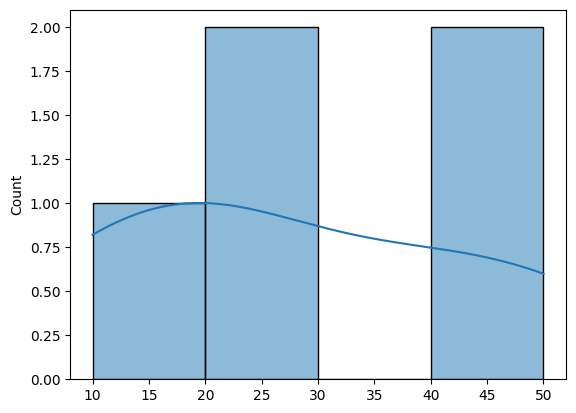

In [3]:
#histogram-KDE(Kernel Density Estimation)
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data, kde=True)
plt.show()

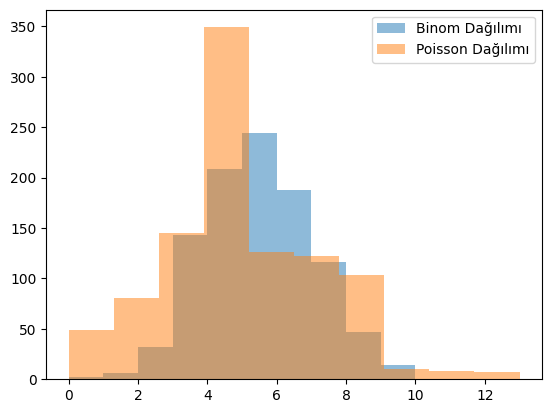

In [4]:
#Python ile binom ve poisson dağılımlarını gösterme
import numpy as np
import matplotlib.pyplot as plt

binom = np.random.binomial(n=10, p=0.5, size=1000)
poisson = np.random.poisson(lam=5, size=1000)

plt.hist(binom, alpha=0.5, label='Binom Dağılımı')
plt.hist(poisson, alpha=0.5, label='Poisson Dağılımı')
plt.legend()
plt.show()

In [5]:
#Python ile Pearson ve Spearman korelasyonu hesaplama:
#Korelasyon ve Nedensellik
import pandas as pd
df = pd.DataFrame({'x': [1,2,3,4,5], 'y': [2,4,6,8,10]})

pearson_corr = df['x'].corr(df['y'], method='pearson')
spearman_corr =  df['x'].corr(df['y'], method='spearman')

print(f"Pearson Korelasyonu: {pearson_corr}, Spearman Korelasyonu: {spearman_corr}")

Pearson Korelasyonu: 0.9999999999999999, Spearman Korelasyonu: 0.9999999999999999


In [6]:
#Hipotez Testleri: H0 ve H1 Hipotezleri
"""- H0 (Null Hipotezi): Arada fark veya ilişki olmadığını varsayar.
- P-Değeri: H0 hipotezinin doğru olma olasılığı. Genellikle 0.05'ten
küçükse sonuç istatistiksel olarak anlamlıdır.
- H1 (Alternatif Hipotez): Farkın veya ilişkinin olduğunu varsayar. """

from scipy import stats

veri1 = [1.2,2.3,3.1,4.0,5.5]
veri2 = [1.8,2.8,3.0,4.7,5.2]

t_stat,p_value = stats.ttest_ind(veri1,veri2)

print(f"T istatistiği: {t_stat}, P-değeri: {p_value}")


T istatistiği: -0.2895071863480909, P-değeri: 0.7795545547198538


In [10]:
#Python ile güven aralığı hesaplama:
import numpy as np
import scipy.stats as st

veri = [10,12,17,19,21,27]

ci = st.t.interval(confidence=0.95, df=len(veri)-1, loc=np.mean(veri), scale=st.sem(veri))

print(f"95% güven aralığı: {ci}")

95% güven aralığı: (11.174851804082888, 24.158481529250448)


In [11]:
#Doğrusal Regresyon: Bağımsız ve bağımlı değişkenler arasındaki doğrusal ilişkiyi modelleme
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2,4,6,8,10])

model = LinearRegression().fit(X,Y)
print(f"Regresyon katsayısı: {model.coef_[0]}")

Regresyon katsayısı: 2.0


In [13]:
#Çoklu Regresyon: Birden fazla bağımsız değişken ile bağımlı değişken arasındaki ilişkiyi modelleme
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
data = {
    'X1': [1,2,3,4,5],
    'X2': [2,4,6,8,10],
    'y': [3,6,9,12,15]
}

df = pd.DataFrame(data)
X = df[['X1','X2']]   #bağımsız değişkenler
y = df['y']   #bağımlı değişken

model = LinearRegression().fit(X,y)

print(f"Regresyon Katsayıları: {model.coef_}")
print(f"Regresyon Sabiti: {model.intercept_}")

new_data = np.array([[6,12]])
y_pred = model.predict(new_data)
print(f"Yeni veri [X1=6, X2=12] için tahmin edilen y: {y_pred[0]}")

Regresyon Katsayıları: [0.6 1.2]
Regresyon Sabiti: 1.7763568394002505e-15
Yeni veri [X1=6, X2=12] için tahmin edilen y: 18.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
